In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image

This notebook serves to get familiar with the ouput of hadge and reproduce some figures from the manuscript.

In [2]:
# The droplet classification by both genoytped- and hashing-based deconvolution methods
classification = pd.read_csv("result_test/rescue/summary/classification_all_genetic_and_hash.csv", delimiter="\t", index_col=0)
classification

,freemuxlet_1,scsplit_1,demuxlet_1,vireo_1,souporcell_1,multiseq_1,demuxem_1,hashedDrops_1,hashsolo_1,htodemux_1
Barcode,,,,,,,,,,
CACTGCACTTCCAT-1,singlet,doublet,singlet,singlet,singlet,singlet,singlet,singlet,negative,singlet
TTCGTATGGGACTT-1,singlet,doublet,singlet,singlet,singlet,singlet,negative,NaN,negative,negative
CGGAATTGGTAAGA-1,singlet,singlet,singlet,singlet,singlet,singlet,singlet,singlet,negative,singlet
TACTCTGATGTTTC-1,singlet,singlet,singlet,singlet,singlet,singlet,singlet,singlet,negative,singlet
TTAGAATGATCGAC-1,singlet,singlet,singlet,singlet,singlet,singlet,negative,NaN,negative,negative
...,...,...,...,...,...,...,...,...,...,...
GTACGAACTGCCAA-1,singlet,singlet,singlet,singlet,singlet,singlet,singlet,singlet,negative,singlet
AGCCGGACTCTCCG-1,singlet,singlet,singlet,singlet,singlet,singlet,singlet,singlet,negative,singlet
TTAGTCACACAGCT-1,singlet,singlet,singlet,singlet,singlet,singlet,negative,NaN,negative,negative


In [3]:
# We run only one task for each methd here, remove the "_1" suffix
classification.columns = classification.columns.str.replace('_1', '')
# Some methods automatically remove the negative droplets in the final result
classification.fillna(value="negative", inplace=True)
classification

,freemuxlet,scsplit,demuxlet,vireo,souporcell,multiseq,demuxem,hashedDrops,hashsolo,htodemux
Barcode,,,,,,,,,,
CACTGCACTTCCAT-1,singlet,doublet,singlet,singlet,singlet,singlet,singlet,singlet,negative,singlet
TTCGTATGGGACTT-1,singlet,doublet,singlet,singlet,singlet,singlet,negative,negative,negative,negative
CGGAATTGGTAAGA-1,singlet,singlet,singlet,singlet,singlet,singlet,singlet,singlet,negative,singlet
TACTCTGATGTTTC-1,singlet,singlet,singlet,singlet,singlet,singlet,singlet,singlet,negative,singlet
TTAGAATGATCGAC-1,singlet,singlet,singlet,singlet,singlet,singlet,negative,negative,negative,negative
...,...,...,...,...,...,...,...,...,...,...
GTACGAACTGCCAA-1,singlet,singlet,singlet,singlet,singlet,singlet,singlet,singlet,negative,singlet
AGCCGGACTCTCCG-1,singlet,singlet,singlet,singlet,singlet,singlet,singlet,singlet,negative,singlet
TTAGTCACACAGCT-1,singlet,singlet,singlet,singlet,singlet,singlet,negative,negative,negative,negative


### Barplot: Classification of genotyped- and hashing-based deconvolution methods

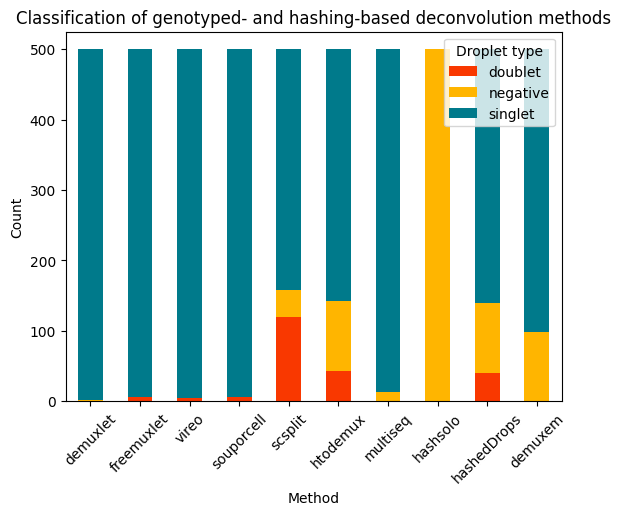

In [4]:
droplet_counts = classification.apply(lambda x: x.value_counts())
methods_all = ["demuxlet", "freemuxlet", "vireo", "souporcell", "scsplit", "htodemux", "multiseq", "hashsolo", "hashedDrops", "demuxem"]
# Sort columns
droplet_counts = droplet_counts[methods_all]
droplet_counts.T.plot(kind='bar', stacked=True, color=['#f93800', '#ffb500', '#007a8b'])
plt.xlabel('Method')
plt.ylabel('Count')
plt.title('Classification of genotyped- and hashing-based deconvolution methods')
plt.xticks(rotation=45)
plt.legend(title='Droplet type', loc='upper right')
plt.show()

In [5]:
# The assignment of droplet identities by both genoytped- and hashing-based deconvolution methods
assignment = pd.read_csv("result_test/rescue/summary/assignment_all_genetic_and_hash.csv", delimiter="\t", index_col=0)
assignment.columns = assignment.columns.str.replace('_1', '')
assignment.fillna(value="negative", inplace=True)
assignment

,freemuxlet,demuxlet,vireo,souporcell,scsplit,hashsolo,htodemux,demuxem,hashedDrops,multiseq
Barcode,,,,,,,,,,
CACTGCACTTCCAT-1,0,293T_RTG,293T_RTG,0,doublet,negative,hto-2,hto_2,2,hto-2
TTCGTATGGGACTT-1,0,293T_RTG,293T_RTG,0,doublet,negative,negative,doublet,negative,hto-1
CGGAATTGGTAAGA-1,0,293T_RTG,293T_RTG,0,2,negative,hto-2,hto_2,2,hto-2
TACTCTGATGTTTC-1,1,jurkat,jurkat,1,0,negative,hto-1,hto_1,1,hto-1
TTAGAATGATCGAC-1,0,293T_RTG,293T_RTG,0,2,negative,negative,doublet,negative,hto-2
...,...,...,...,...,...,...,...,...,...,...
GTACGAACTGCCAA-1,1,jurkat,jurkat,1,0,negative,hto-1,hto_1,1,hto-1
AGCCGGACTCTCCG-1,1,jurkat,jurkat,1,0,negative,hto-1,hto_1,1,hto-1
TTAGTCACACAGCT-1,1,jurkat,jurkat,1,0,negative,negative,doublet,negative,hto-1


In [6]:
# Replace the hashtags with true identity: hto-1 represents jurkat cells and hto-2 represents 293T-RTG cells
assignment.replace({"hto_1": "jurkat", "hto_2": "293T_RTG"}, inplace=True)
assignment.replace({"hto-1": "jurkat", "hto-2": "293T_RTG"}, inplace=True)
assignment.hashedDrops.replace({"1": "jurkat", "2": "293T_RTG"}, inplace=True)
assignment

,freemuxlet,demuxlet,vireo,souporcell,scsplit,hashsolo,htodemux,demuxem,hashedDrops,multiseq
Barcode,,,,,,,,,,
CACTGCACTTCCAT-1,0,293T_RTG,293T_RTG,0,doublet,negative,293T_RTG,293T_RTG,293T_RTG,293T_RTG
TTCGTATGGGACTT-1,0,293T_RTG,293T_RTG,0,doublet,negative,negative,doublet,negative,jurkat
CGGAATTGGTAAGA-1,0,293T_RTG,293T_RTG,0,2,negative,293T_RTG,293T_RTG,293T_RTG,293T_RTG
TACTCTGATGTTTC-1,1,jurkat,jurkat,1,0,negative,jurkat,jurkat,jurkat,jurkat
TTAGAATGATCGAC-1,0,293T_RTG,293T_RTG,0,2,negative,negative,doublet,negative,293T_RTG
...,...,...,...,...,...,...,...,...,...,...
GTACGAACTGCCAA-1,1,jurkat,jurkat,1,0,negative,jurkat,jurkat,jurkat,jurkat
AGCCGGACTCTCCG-1,1,jurkat,jurkat,1,0,negative,jurkat,jurkat,jurkat,jurkat
TTAGTCACACAGCT-1,1,jurkat,jurkat,1,0,negative,negative,doublet,negative,jurkat


We've observed that freemuxlet, souporcell and scSplit assign donor IDs to droplets. We use donor matching to reveal the true identity of these droplets.

The result of donor matching is saved in the folder `rescue/donor_match`. In `score_record.csv`, you'll find a summary of matching scores for all combinations between genotyped and hashing-based deconvolution methods. The `score` column represents the Pearson correlation score of matching, and the `matched_donor` column records the number of matched donors. The `remain_na` column is set to True only when all donors in the cell mixture are matched. This is important especially when the correlation score is high but the number of matched donors is low.

In [7]:
donor_match_overview = pd.read_csv("result_test/rescue/donor_match/score_record.csv")
donor_match_overview

,best_method1,best_method2,score,matched_donor,remain_na
0,freemuxlet_1,htodemux_1,1.000000,2,False
1,freemuxlet_1,demuxem_1,0.919222,2,False
2,freemuxlet_1,hashedDrops_1,1.000000,2,False
3,freemuxlet_1,multiseq_1,0.730091,2,False
4,demuxlet_1,htodemux_1,1.000000,2,False
5,demuxlet_1,demuxem_1,0.905102,2,False
6,demuxlet_1,hashedDrops_1,1.000000,2,False
7,demuxlet_1,multiseq_1,0.720640,2,False
8,vireo_1,htodemux_1,1.000000,2,False
9,vireo_1,demuxem_1,0.914350,2,False


From the table we can see that freemuxlet, souporcell and scsplit achieve the highest matching score with htodemux. For more detailed information on the donor matching results, you can explore the folders `rescue/donor_match/freemuxlet_1_vs_htodemux_1` and `rescue/donor_match/scsplit_1_vs_htodemux_1` respectively.

In [8]:
os.listdir("result_test/rescue/donor_match/freemuxlet_1_vs_htodemux_1")

['donor_match.csv',
 'correlation_res.csv',
 'intersect_assignment_after_match.csv',
 'concordance_heatmap.png',
 'all_assignment_after_match.csv']

The heatmap `concordance_heatmap.png` illustrates the matching of assignments between two methods based on correlation scores. Additionally, `donor_match.csv` stores the ultimate matches from donor IDs to hashtags. The files `all_assignment_after_match.csv` and `intersect_assignment_after_match.csv` contain assignments where donor IDs are replaced with the corresponding matched hashtags. The latter CSV file retains only the droplets with consistent assignments between the two methods.

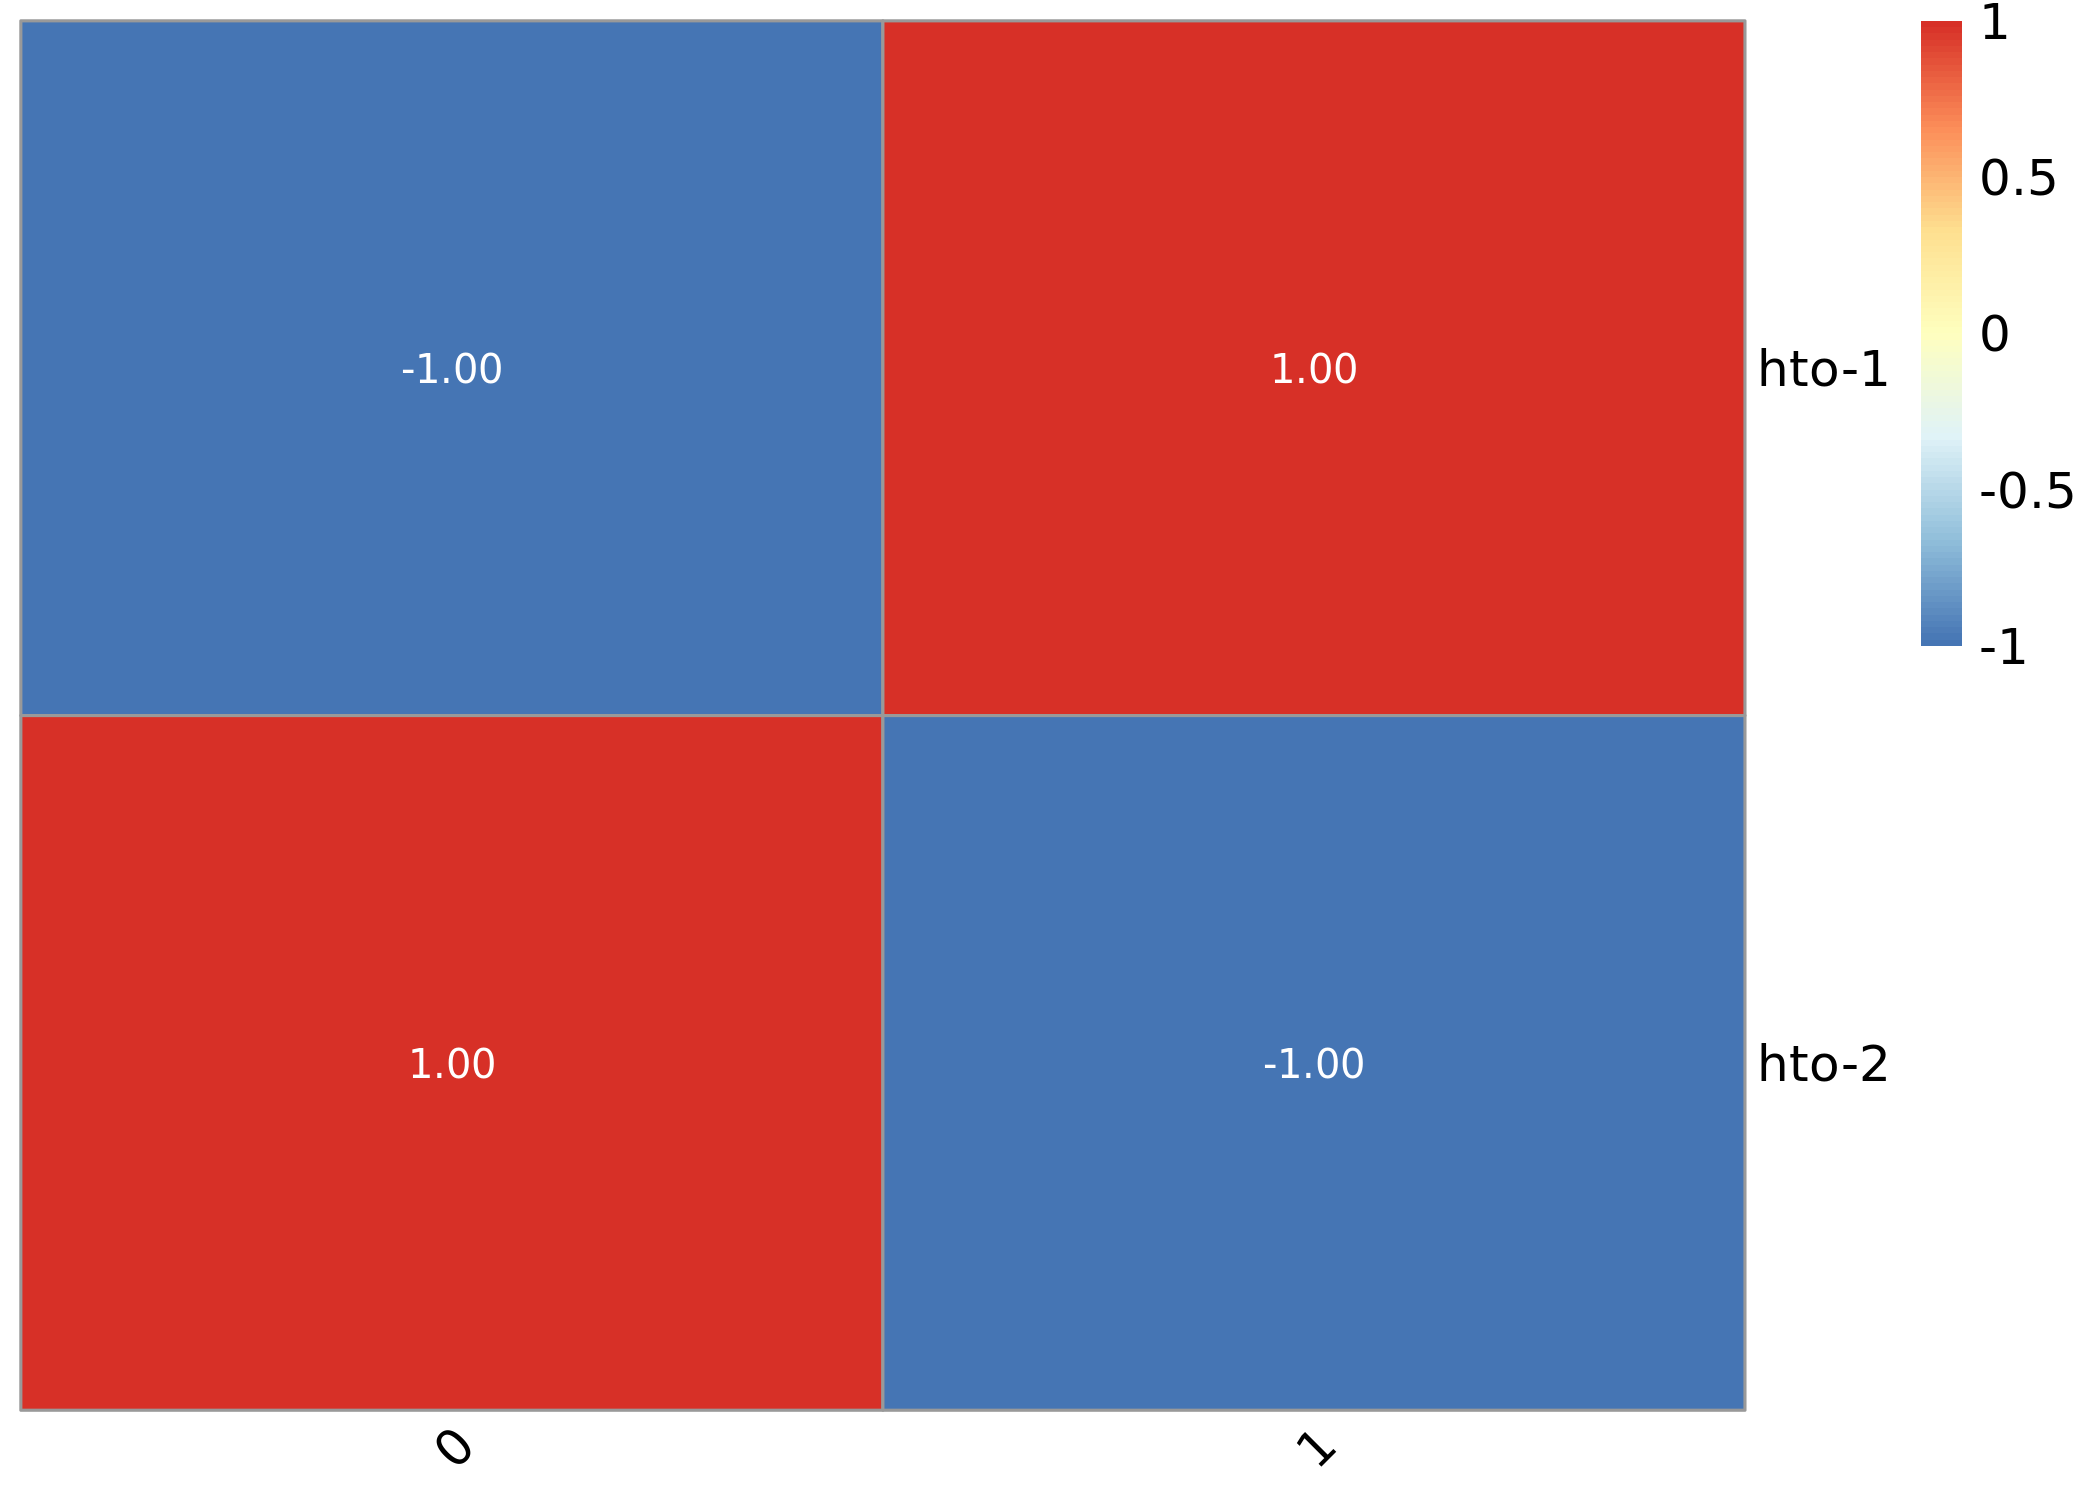

In [9]:
Image(filename='result_test/rescue/donor_match/freemuxlet_1_vs_htodemux_1/concordance_heatmap.png') 

In [10]:
assignment.freemuxlet.replace({"1": "jurkat", "0": "293T_RTG"}, inplace=True)
assignment.scsplit.replace({"2": "jurkat", "0": "293T_RTG"}, inplace=True)
assignment.souporcell.replace({"1": "jurkat", "0": "293T_RTG"}, inplace=True)
assignment

,freemuxlet,demuxlet,vireo,souporcell,scsplit,hashsolo,htodemux,demuxem,hashedDrops,multiseq
Barcode,,,,,,,,,,
CACTGCACTTCCAT-1,293T_RTG,293T_RTG,293T_RTG,293T_RTG,doublet,negative,293T_RTG,293T_RTG,293T_RTG,293T_RTG
TTCGTATGGGACTT-1,293T_RTG,293T_RTG,293T_RTG,293T_RTG,doublet,negative,negative,doublet,negative,jurkat
CGGAATTGGTAAGA-1,293T_RTG,293T_RTG,293T_RTG,293T_RTG,jurkat,negative,293T_RTG,293T_RTG,293T_RTG,293T_RTG
TACTCTGATGTTTC-1,jurkat,jurkat,jurkat,jurkat,293T_RTG,negative,jurkat,jurkat,jurkat,jurkat
TTAGAATGATCGAC-1,293T_RTG,293T_RTG,293T_RTG,293T_RTG,jurkat,negative,negative,doublet,negative,293T_RTG
...,...,...,...,...,...,...,...,...,...,...
GTACGAACTGCCAA-1,jurkat,jurkat,jurkat,jurkat,293T_RTG,negative,jurkat,jurkat,jurkat,jurkat
AGCCGGACTCTCCG-1,jurkat,jurkat,jurkat,jurkat,293T_RTG,negative,jurkat,jurkat,jurkat,jurkat
TTAGTCACACAGCT-1,jurkat,jurkat,jurkat,jurkat,293T_RTG,negative,negative,doublet,negative,jurkat


### Barplot: Assignment of genotyped- and hashing-based deconvolution methods

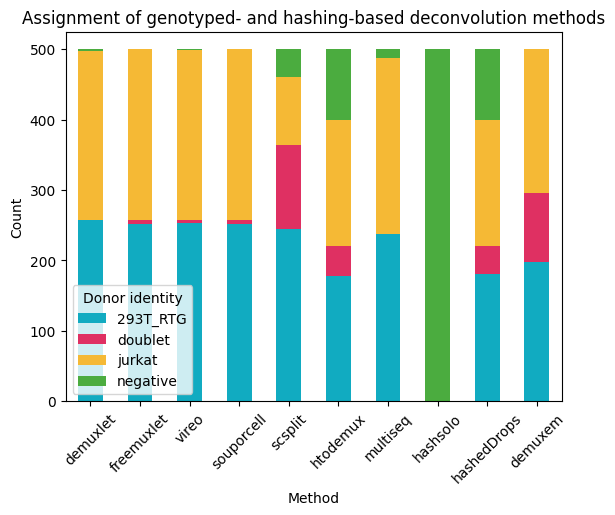

In [11]:
droplet_counts = assignment.apply(lambda x: x.value_counts())
droplet_counts = droplet_counts[methods_all]
droplet_counts.T.plot(kind='bar', stacked=True, color=['#11abc1', '#df3062', '#f5b935', '#4bac3f'])
plt.xlabel('Method')
plt.ylabel('Count')
plt.title('Assignment of genotyped- and hashing-based deconvolution methods')
plt.xticks(rotation=45)
plt.legend(title='Donor identity', loc='lower left')
plt.show()